In [25]:
import polars as pl
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
commission = 0.25 / 10000.0


In [26]:
result_hour = pl.read_parquet("data/hourly_data.pa")
close = result_hour[["open_time", "symbol", "close"]].pivot(index="open_time", columns="symbol", values="close").sort("open_time")
columns = close.columns[1:]
factors = close.clone()
factors

open_time,1000LUNCUSDT,1000SHIBUSDT,1000XECUSDT,1INCHUSDT,AAVEUSDT,ADAUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,ANKRUSDT,ANTUSDT,APEUSDT,API3USDT,APTUSDT,ARPAUSDT,ARUSDT,ATAUSDT,ATOMUSDT,AUDIOUSDT,AVAXUSDT,AXSUSDT,BAKEUSDT,BALUSDT,BANDUSDT,BATUSDT,BCHUSDT,BELUSDT,BLUEBIRDUSDT,BLZUSDT,BNBUSDT,BTCDOMUSDT,BTCUSDT,BTSUSDT,C98USDT,CELOUSDT,CELRUSDT,…,RLCUSDT,ROSEUSDT,RSRUSDT,RUNEUSDT,RVNUSDT,SANDUSDT,SCUSDT,SFPUSDT,SKLUSDT,SNXUSDT,SOLUSDT,SPELLUSDT,SRMUSDT,STGUSDT,STMXUSDT,STORJUSDT,SUSHIUSDT,SXPUSDT,THETAUSDT,TOMOUSDT,TRBUSDT,TRXUSDT,UNFIUSDT,UNIUSDT,VETUSDT,WAVESUSDT,WOOUSDT,XEMUSDT,XLMUSDT,XMRUSDT,XRPUSDT,XTZUSDT,YFIUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2020-01-01 00:00:00,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,204.61,null,null,null,null,null,7171.55,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2020-01-01 01:00:00,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,206.21,null,null,null,null,null,7210.24,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2020-01-01 02:00:00,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,207.34,null,null,null,null,null,7237.99,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2020-01-01 03:00:00,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,205.67,null,null,null,null,null,7221.65,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2020-01-01 04:00:00,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,206.18,null,null,null,null,null,7213.86,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1455,0.008112,0.02186,0.3864,52.58,0.2483,0.1727,1.069,0.06716,0.01529,2.229,3.622,1.032,3.45,0.02618,6.235,0.0907,9.342,0.1275,10.978,6.055,0.1286,5.218,1.4183,0.1671,97.14,0.3881,6.544,0.04971,246.79,1357.5,16564.3,null,0.158,0.472,0.00953,…,1.2325,0.03425,0.002844,1.283,0.01846,0.3868,null,0.3945,0.01994,1.458,10.047,0.0005287,null,0.3641,0.00352,0.2446,0.928,0.2012,0.7267,0.2562,12.21,0.05449,3.649,5.167,0.01573,1.3087,0.12041,0.0285,0.07098,147.87,0.3426,0.726,5077.0,37.92,9.203,0.01592,0.1496
2022-12-31 20:00:00,0.146,0.008112,0.02191,0.3872,52.6,0.2489,0.1721,1.053,0.0677,0.01532,2.226,3.633,1.026,3.4705,0.02623,6.239,0.0909,9.355,0.128,10.962,6.063,0.1285,5.234,1.4212,0.1669,97.56,0.3886,6.547,0.04971,246.83,1356.9,16563.5,null,0.1577,0.474,0.00951,…,1.2325,0.03437,0.002847,1.283,0.01847,0.3855,null,0.3963,0.01997,1.459,10.069,0.0005301,null,0.3638,0.00353,0.245,0.934,0.2016,0.7267,0.2561,

In [27]:
# 因子未来收益率：
ret = close.clone()
ret[columns] = ret[columns].shift(-1) / ret[columns] - 1

# 对齐column
ret = ret[factors.columns] 
t = factors[["open_time"]] 

# 对齐open_time
ret = ret.join(t, how="inner", on=["open_time"]).sort(by=["open_time"]) 
factors = factors.sort(by=["open_time"])

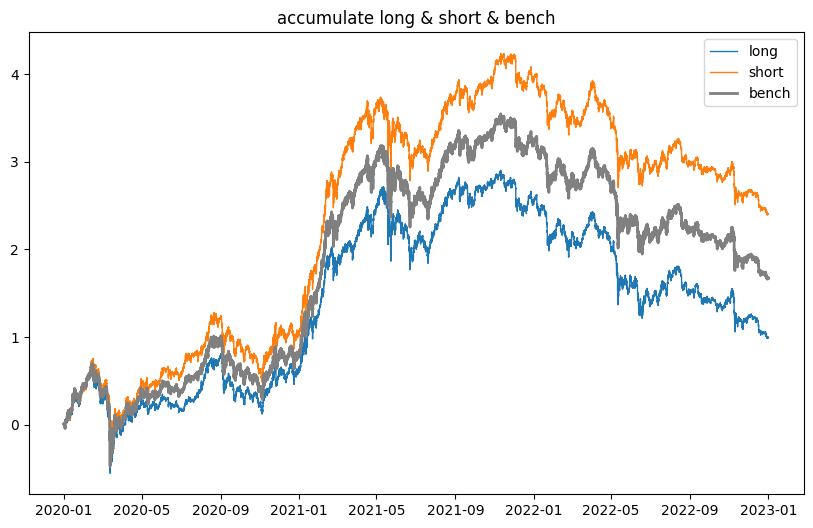

long: 
ann_return = 0.331  sharpe = 0.3123  maxdd = 0.7282  calmar_ratio = 0.4546  

short: 
ann_return = 0.8017  sharpe = 0.7096  maxdd = 0.6593  calmar_ratio = 1.2161  

bench: 
ann_return = 0.5573  sharpe = 0.5128  maxdd = 0.6895  calmar_ratio = 0.8082  



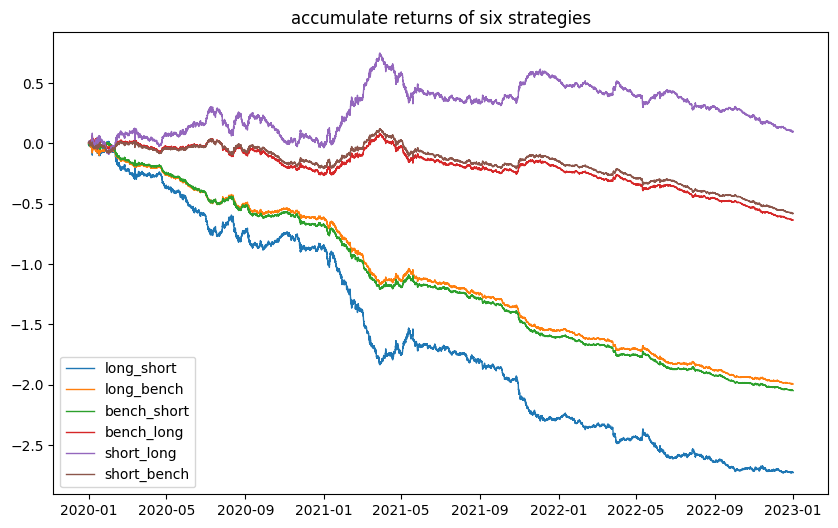

long_short: 
ann_return = -0.9087  sharpe = -3.1702  maxdd = 2.7065  calmar_ratio = -0.3357  

long_bench: 
ann_return = -0.6643  sharpe = -4.5864  maxdd = 1.9935  calmar_ratio = -0.3332  

bench_short: 
ann_return = -0.6824  sharpe = -4.712  maxdd = 2.0289  calmar_ratio = -0.3363  

bench_long: 
ann_return = -0.2117  sharpe = -1.4618  maxdd = 0.6639  calmar_ratio = -0.3189  

short_long: 
ann_return = 0.0327  sharpe = 0.114  maxdd = 0.3735  calmar_ratio = 0.0875  

short_bench: 
ann_return = -0.1936  sharpe = -1.3368  maxdd = 0.628  calmar_ratio = -0.3083  



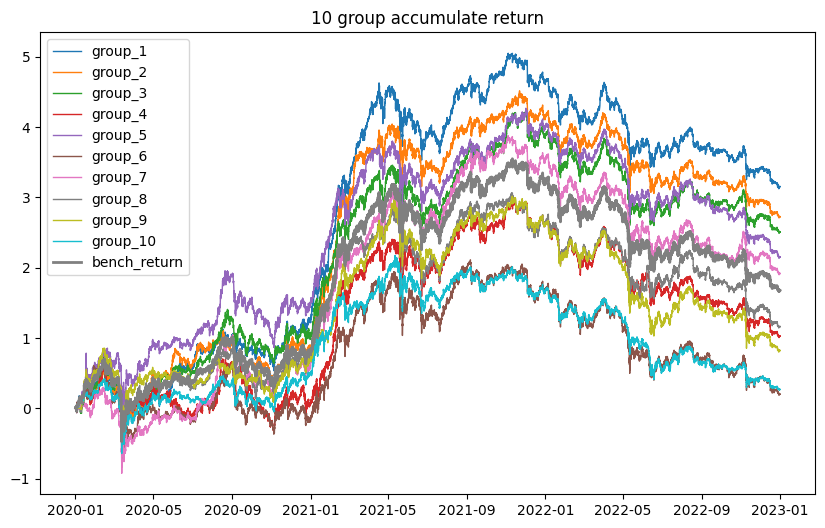

group_1: 
ann_return = 1.0498  sharpe = 0.8876  maxdd = 0.8133  calmar_ratio = 1.2908  

group_2: 
ann_return = 0.9068  sharpe = 0.8016  maxdd = 0.6928  calmar_ratio = 1.3089  

group_3: 
ann_return = 0.8334  sharpe = 0.7113  maxdd = 0.6806  calmar_ratio = 1.2246  

group_4: 
ann_return = 0.3411  sharpe = 0.2831  maxdd = 0.6734  calmar_ratio = 0.5065  

group_5: 
ann_return = 0.7157  sharpe = 0.5821  maxdd = 0.5512  calmar_ratio = 1.2984  

group_6: 
ann_return = 0.0664  sharpe = 0.0559  maxdd = 0.8473  calmar_ratio = 0.0784  

group_7: 
ann_return = 0.6374  sharpe = 0.5376  maxdd = 0.9409  calmar_ratio = 0.6775  

group_8: 
ann_return = 0.3863  sharpe = 0.3359  maxdd = 0.6722  calmar_ratio = 0.5747  

group_9: 
ann_return = 0.2729  sharpe = 0.2526  maxdd = 0.6532  calmar_ratio = 0.4178  

group_10: 
ann_return = 0.0886  sharpe = 0.0944  maxdd = 0.7484  calmar_ratio = 0.1184  



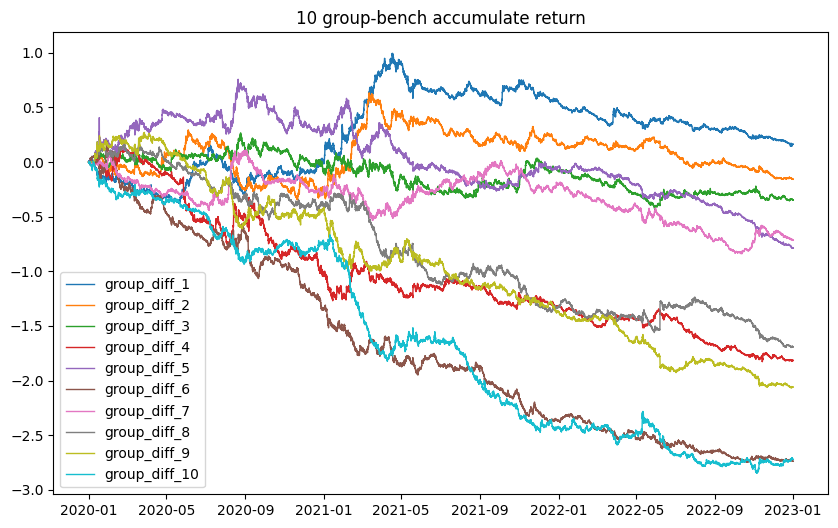

group_diff_1: 
ann_return = 0.0545  sharpe = 0.1465  maxdd = 0.4263  calmar_ratio = 0.1279  

group_diff_2: 
ann_return = -0.052  sharpe = -0.143  maxdd = 0.4946  calmar_ratio = -0.1052  

group_diff_3: 
ann_return = -0.116  sharpe = -0.3183  maxdd = 0.5509  calmar_ratio = -0.2105  

group_diff_4: 
ann_return = -0.6048  sharpe = -1.5215  maxdd = 1.7251  calmar_ratio = -0.3506  

group_diff_5: 
ann_return = -0.2625  sharpe = -0.6506  maxdd = 0.8805  calmar_ratio = -0.2982  

group_diff_6: 
ann_return = -0.9118  sharpe = -2.4307  maxdd = 2.4726  calmar_ratio = -0.3688  

group_diff_7: 
ann_return = -0.2382  sharpe = -0.6696  maxdd = 0.8559  calmar_ratio = -0.2783  

group_diff_8: 
ann_return = -0.5631  sharpe = -1.6047  maxdd = 1.5877  calmar_ratio = -0.3547  

group_diff_9: 
ann_return = -0.686  sharpe = -1.9331  maxdd = 1.8395  calmar_ratio = -0.3729  

group_diff_10: 
ann_return = -0.9067  sharpe = -2.5344  maxdd = 2.8359  calmar_ratio = -0.3197  



In [28]:
factors_np = factors[columns].to_numpy()
ret_np = ret[columns].to_numpy()

def factor_stats(n, pnl):
    net_value = pnl.cum_sum() + 1.0
    sharpe = n ** 0.5 * pnl.mean() / pnl.std()
    ann_return = n * pnl.mean()
    maxdd = (-(net_value / net_value.cum_max() - 1)).max()
    calmar_ratio = ann_return / maxdd

    print("ann_return =", round(ann_return, 4), end='  ')
    print("sharpe =", round(sharpe, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')


percentage = 0.5
quantiles = np.nanquantile(factors_np, [1 - percentage, percentage], axis=1)

f = lambda x: quantiles[x][:, None].repeat(factors_np.shape[1], axis=-1)
long_quantile, short_quantile = f(0), f(1)

# return before fee
long = np.nan_to_num(np.nan_to_num(ret_np * (factors_np > long_quantile), 0.0).sum(axis=1) / (factors_np > long_quantile).sum(axis=1) , 0.0)
short = np.nan_to_num(np.nan_to_num(ret_np * (factors_np < long_quantile), 0.0).sum(axis=1) / (factors_np < long_quantile).sum(axis=1) , 0.0)
bench = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0)

# return after fee
long_fee = pl.Series(long - 2 * commission)
short_fee = pl.Series(short - 2 * commission)
bench_fee = pl.Series(bench - 2 * commission)

long_short = pl.Series(long - short - 2 * commission)
long_bench = pl.Series(long - bench - 2 * commission)
bench_short = pl.Series(bench - short - 2 * commission)
bench_long = pl.Series(bench - long - 2 * commission)
short_long = pl.Series(short - long - 2 * commission)
short_bench = pl.Series(short - bench - 2 * commission)

long_cum = long_fee.cum_sum()
short_cum = short_fee.cum_sum()
bench_cum = bench_fee.cum_sum()

long_short_cum = long_short.cum_sum()
long_bench_cum = long_bench.cum_sum()
bench_short_cum = bench_short.cum_sum()
bench_long_cum = bench_long.cum_sum()
short_long_cum = short_long.cum_sum()
short_bench_cum = short_bench.cum_sum()

plt.figure(figsize=(10, 6))
plt.plot(factors["open_time"].to_pandas(), long_cum.to_pandas(), label='long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), short_cum.to_pandas(), label='short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_cum.to_pandas(), label='bench', linewidth=2, color="gray")
plt.title("accumulate long & short & bench")
plt.legend()
plt.show()

# 因子评价指标
n = 365 * 24
print("long: ")
factor_stats(n, long_fee)
print("\n")
print("short: ")
factor_stats(n, short_fee)
print("\n")
print("bench: ")
factor_stats(n, bench_fee)
print("\n")


plt.figure(figsize=(10, 6))
plt.plot(factors["open_time"].to_pandas(), long_short_cum.to_pandas(), label='long_short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), long_bench_cum.to_pandas(), label='long_bench', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_short_cum.to_pandas(), label='bench_short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_long_cum.to_pandas(), label='bench_long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), short_long_cum.to_pandas(), label='short_long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(),short_bench_cum.to_pandas(), label='short_bench', linewidth=1)
plt.title("accumulate returns of six strategies")
plt.legend()
plt.show()


# 因子评价指标
print("long_short: ")
factor_stats(n, long_short)
print("\n")

print("long_bench: ")
factor_stats(n, long_bench)
print("\n")

print("bench_short: ")
factor_stats(n, bench_short)
print("\n")

print("bench_long: ")
factor_stats(n, bench_long)
print("\n")

print("short_long: ")
factor_stats(n, short_long)
print("\n")

print("short_bench: ")
factor_stats(n, short_bench)
print("\n")

###################################################################################################################

quantiles = np.nanquantile(factors_np, np.linspace(0, 1, 11), axis=1)
total_count = np.count_nonzero(~np.isnan(factors_np), axis=1)
f = lambda x: quantiles[x][:, None].repeat(factors_np.shape[1], axis=-1)

#bench_return = np.nan_to_num(ret_np, 0.0).mean(axis=1)
bench_return = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0)
bench_return_fee = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0) - 2 * commission
group_return = np.zeros((factors_np.shape[0], 10))
group_diff_return = np.zeros((factors_np.shape[0], 10))

for i in range(1, 11):
    # 计算在当前分位数范围内的总收益。如果因子值位于该分位数的范围内，则相应的收益被计入总和。
    ret_sum = np.nan_to_num(ret_np * (f(i-1) <= factors_np) * (factors_np <= f(i)), 0.0).sum(axis=1)
    # 计算当前分位数范围内的有效数据点数
    ret_count = np.nan_to_num((f(i-1) <= factors_np) * (factors_np <= f(i)), 0.0).sum(axis=1)
    group_return[:, i-1] = ret_sum / ret_count - 2 * commission 
    group_diff_return[:, i-1] = ret_sum / ret_count - bench_return - 2 * commission


group_return = np.nan_to_num(group_return)
group_diff_return = np.nan_to_num(group_diff_return)


plt.figure(figsize=(10, 6))
plt.title("10 group accumulate return")
for i in range(10):
    plt.plot(factors["open_time"].to_pandas(), np.cumsum(group_return[:, i]), label=f"group_{i+1}", linewidth=1)
plt.plot(factors["open_time"].to_pandas(), np.cumsum(bench_return_fee), label=f"bench_return", linewidth=2, color="gray")
plt.legend()
plt.show()

for i in range(10):
    print(f"group_{i+1}: ")
    net_value = np.cumsum(group_return[:, i]) + 1.0
    sharpe = n ** 0.5 * group_return[:, i].mean() / group_return[:, i].std()
    ann_return = n * group_return[:, i].mean()
    maxdd = (-(net_value / np.maximum.accumulate(net_value) - 1)).max()
    calmar_ratio = ann_return / maxdd
    print("ann_return =", round(ann_return, 4), end='  ')
    print("sharpe =", round(sharpe, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')
    print("\n")


plt.figure(figsize=(10, 6))
plt.title("10 group-bench accumulate return")
for i in range(10):
    plt.plot(factors["open_time"].to_pandas(), np.cumsum(group_diff_return[:, i]), label=f"group_diff_{i+1}", linewidth=1)
plt.legend()
plt.show()

for i in range(10):
    print(f"group_diff_{i+1}: ")
    net_value = np.cumsum(group_diff_return[:, i]) + 1.0
    sharpe = n ** 0.5 * group_diff_return[:, i].mean() / group_diff_return[:, i].std()
    ann_return = n * group_diff_return[:, i].mean()
    maxdd = (-(net_value / np.maximum.accumulate(net_value) - 1)).max()
    calmar_ratio = ann_return / maxdd
    print("ann_return =", round(ann_return, 4), end='  ')
    print("sharpe =", round(sharpe, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')
    print("\n")